In [1]:
from afinn import Afinn
import random
import collections
from nltk.corpus import stopwords
from nltk import tokenize
import pandas as pd
import numpy as np
from textblob import TextBlob as tb
import nltk
# nltk.download('vader_lexicon')
import nltk.data
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
afinn = Afinn(language='en')
afinn.score('This is utterly excellent!')

3.0

In [3]:
def readFile(filename):
    '''takes in a file with name filename and returns list of lines read, unprocessed'''
    with open(filename, 'r', encoding="utf8") as f:
        lines = f.readlines()
        f.close()
    return lines

In [4]:
def getTotalNumberOfWords(filename):
    '''takes in a file with name filename and returns the total number of words in the file'''
    word_count = 0
    lines = readFile(filename)
    for line in lines:
        if "CHAPTER" not in line:
            word_count += len(line.split())
    return word_count

In [5]:
def getTotalUniqueWords(filename):
    '''takes in a file with name filename and returns the number of unique words in the file'''
    unique_words = set()
    lines = readFile(filename)
    for line in lines:
        if "CHAPTER" not in line:
            words = line.split()
            for word in words:
                unique_words.add(word)
    return len(unique_words)

In [6]:
def get20MostFrequentWords(filename):
    '''takes in a file with name filename and returns an array of the top 20 interesting words in the file along with their counts'''
    lines = readFile(filename)
    stop_words = set(stopwords.words('english'))
    word_dict = {}
    for line in lines:
        if "CHAPTER" not in line:
            words = line.split()
            for word in words:
                word = word.strip(" ,\".:\'").lower()
                if word in stop_words:
                    continue
                if word not in word_dict:
                    word_dict[word] = 1
                else:
                    word_dict[word] += 1
    counter = collections.Counter(word_dict)
    top_words = []
    for key, value in counter.most_common(50):
        top_words.append([key, value])
    return top_words

In [7]:
def get20LeastFrequentWords(filename):
    '''takes in a file with name filename and returns an array of the 20 least frequent interesting words in the file along with their counts'''
    lines = readFile(filename)
    stop_words = set(stopwords.words('english'))
    word_dict = {}
    for line in lines:
        if "CHAPTER" not in line:
            words = line.split()
            for word in words:
                word = word.strip(" ,\".:\'").lower()
                if word in stop_words:
                    continue
                if word not in word_dict:
                    word_dict[word] = 1
                else:
                    word_dict[word] += 1
    least_frequent_words = []
    # assumes >= 20 words are used only once
    for key, value in word_dict.items():
        if value == 1:
            least_frequent_words.append([key, value])
        if len(least_frequent_words) == 20:
            break
    return least_frequent_words

In [8]:
pos_index = []
neg_index = []
neutral_index = []

In [9]:
list_of_books = ['twenty_thousand', 'journey_to_center', 'mysterious_island',
                 'round_the_moon', 'from_earth_to_moon', 'around_the_world']

path = r"C:\\Users\\Nemo\\Downloads\\Jules Verne\\"

total_no_of_words = []
total_no_of_unique_words = []
most_20_freq_words = []
least_20_fre_words = []

for book in list_of_books:
    relpath = path + book + ".txt"
    
    words = getTotalNumberOfWords(relpath)
    total_no_of_words.append(words)
    
    unique_words = getTotalUniqueWords(relpath)
    total_no_of_unique_words.append(unique_words)
    
    top_20_freq_words = get20MostFrequentWords(relpath)
    most_20_freq_words.append(top_20_freq_words)
    
    lowest_20_freq_words = get20LeastFrequentWords(relpath)
    least_20_fre_words.append(lowest_20_freq_words)

In [10]:
total_no_of_words

[104091, 85206, 193189, 48366, 39934, 62264]

In [11]:
total_no_of_unique_words

[15822, 13433, 19259, 8938, 9019, 11832]

In [12]:
most_20_freq_words

[[['captain', 554],
  ['_nautilus_', 488],
  ['one', 337],
  ['nemo', 330],
  ['said', 329],
  ['could', 308],
  ['would', 287],
  ['ned', 280],
  ['us', 265],
  ['sea', 264],
  ['conseil', 243],
  ['land', 214],
  ['two', 210],
  ['like', 208],
  ['water', 193],
  ['long', 168],
  ['must', 144],
  ['feet', 142],
  ['made', 139],
  ['day', 138],
  ['surface', 138],
  ['see', 137],
  ['“i', 136],
  ['time', 135],
  ['without', 133],
  ['replied', 127],
  ['great', 122],
  ['saw', 122],
  ['canadian', 121],
  ['seemed', 119],
  ['went', 114],
  ['upon', 112],
  ['ocean', 111],
  ['still', 110],
  ['air', 109],
  ['light', 109],
  ['miles', 106],
  ['man', 104],
  ['last', 102],
  ['yards', 96],
  ['large', 95],
  ['first', 93],
  ['shall', 90],
  ['waters', 89],
  ['vessel', 88],
  ['waves', 88],
  ['board', 87],
  ['eyes', 85],
  ['three', 84],
  ['towards', 84]],
 [['uncle', 460],
  ['us', 265],
  ['one', 260],
  ['could', 252],
  ['said', 208],
  ['would', 190],
  ['upon', 184],
  ['p

In [13]:
least_20_fre_words

[[['signalised', 1],
  ['rumours', 1],
  ['seafaring', 1],
  ['skippers', 1],
  ['thing,”', 1],
  ['spindle-shaped', 1],
  ['infinitely', 1],
  ['relating', 1],
  ['(entered', 1],
  ['log-books)', 1],
  ['respects', 1],
  ['untiring', 1],
  ['locomotion', 1],
  ['times,—rejecting', 1],
  ['length,—we', 1],
  ['conclude', 1],
  ['ichthyologists', 1],
  ['_did_', 1],
  ['undeniable', 1],
  ['fact;', 1]],
 [['eventful', 1],
  ["mother's", 1],
  ['sister', 1],
  ['englishwoman', 1],
  ['fatherless', 1],
  ['fatherland', 1],
  ['chemistry', 1],
  ['ologies', 1],
  ['laboratory--my', 1],
  ['renovating', 1],
  ['tissues--<i>i.e.</i>', 1],
  ['von', 1],
  ['upstairs', 1],
  ['choleric', 1],
  ['obey;', 1],
  ['resounded', 1],
  ['joint', 1],
  ['domicile', 1],
  ['harry--harry--harry--', 1],
  ['stamping', 1]],
 [['contrary.”', 1],
  ['descending?”', 1],
  ['“worse', 1],
  ['falling!”', 1],
  ['heaven’s', 1],
  ['ballast!”', 1],
  ['“there!', 1],
  ['sack', 1],
  ['empty!”', 1],
  ['“no!”', 1

In [14]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

fp1 = open(r"C:\\Users\\Nemo\\Downloads\\Jules Verne\\twenty_thousand.txt", encoding="utf8")
data_1 = fp1.read()
text_1 = tokenizer.tokenize(data_1)

df_text_1 = pd.DataFrame(text_1,columns =['Sentences'])
df_text_1

# identify partial string
discard = ["CHAP"]
  
# drop rows that contain the partial string "Sci"
df_text_1 = df_text_1[~df_text_1.Sentences.str.contains('|'.join(discard))]
  
#display
df_text_1.head()

,Sentences
1,The year 1866 was signalised by a remarkable i...
2,Not to\nmention rumours which agitated the mar...
3,"Merchants, common sailors, captains of vessels..."
4,"For some time past, vessels had been met by “a..."
5,The facts relating to this apparition (entered...


In [15]:
df_text_1 = df_text_1.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)
df_text_1 = df_text_1.reset_index(drop=True)
df_text_1.head()

,Sentences
0,The year 1866 was signalised by a remarkable i...
1,Not to mention rumours which agitated the mari...
2,"Merchants, common sailors, captains of vessels..."
3,"For some time past, vessels had been met by “a..."
4,The facts relating to this apparition (entered...


In [16]:
df_text_1["Afinn_Score"] = df_text_1.apply(lambda row : afinn.score(row["Sentences"]), axis = 1)

In [17]:
df_text_1.head()

,Sentences,Afinn_Score
0,The year 1866 was signalised by a remarkable i...,0.0
1,Not to mention rumours which agitated the mari...,6.0
2,"Merchants, common sailors, captains of vessels...",3.0
3,"For some time past, vessels had been met by “a...",0.0
4,The facts relating to this apparition (entered...,3.0


In [18]:
# create a list of our conditions
conditions = [
    (df_text_1['Afinn_Score'] < 0),
    (df_text_1['Afinn_Score'] > 0),
    (df_text_1['Afinn_Score'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'positive', 'neutral']

# create a new column and use np.select to assign values to it using our lists as arguments
df_text_1['Afinn_Sentiment'] = np.select(conditions, values)

In [19]:
df_text_1.head()

,Sentences,Afinn_Score,Afinn_Sentiment
0,The year 1866 was signalised by a remarkable i...,0.0,neutral
1,Not to mention rumours which agitated the mari...,6.0,positive
2,"Merchants, common sailors, captains of vessels...",3.0,positive
3,"For some time past, vessels had been met by “a...",0.0,neutral
4,The facts relating to this apparition (entered...,3.0,positive


In [20]:
df_text_1["TextBlob_Polarity"] = df_text_1['Sentences'].apply(lambda x:tb(x).sentiment[0])

In [21]:
# create a list of our conditions
conditions = [
    (df_text_1['TextBlob_Polarity'] < 0),
    (df_text_1['TextBlob_Polarity'] > 0),
    (df_text_1['TextBlob_Polarity'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'positive', 'neutral']

# create a new column and use np.select to assign values to it using our lists as arguments
df_text_1['TextBlob_Sentiment'] = np.select(conditions, values)

In [22]:
df_text_1

,Sentences,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment
0,The year 1866 was signalised by a remarkable i...,0.0,neutral,0.375000,positive
1,Not to mention rumours which agitated the mari...,6.0,positive,0.250000,positive
2,"Merchants, common sailors, captains of vessels...",3.0,positive,-0.016667,negative
3,"For some time past, vessels had been met by “a...",0.0,neutral,0.033333,positive
4,The facts relating to this apparition (entered...,3.0,positive,0.400000,positive
...,...,...,...,...,...
5390,"May the judge disappear, and the philosopher c...",2.0,positive,0.312500,positive
5391,"If his destiny be strange, it is also sublime.",-1.0,negative,-0.050000,negative
5392,Have I not understood it myself?,0.0,neutral,0.000000,neutral
5393,Have I not lived ten months of this unnatural ...,0.0,neutral,0.000000,neutral


In [23]:
senti_int_anal = SentimentIntensityAnalyzer()
df_text_1["NLTK_Scores"] = df_text_1['Sentences'].apply(lambda x:senti_int_anal.polarity_scores(x)["compound"])
df_text_1

,Sentences,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment,NLTK_Scores
0,The year 1866 was signalised by a remarkable i...,0.0,neutral,0.375000,positive,0.3400
1,Not to mention rumours which agitated the mari...,6.0,positive,0.250000,positive,0.2023
2,"Merchants, common sailors, captains of vessels...",3.0,positive,-0.016667,negative,0.4754
3,"For some time past, vessels had been met by “a...",0.0,neutral,0.033333,positive,0.0000
4,The facts relating to this apparition (entered...,3.0,positive,0.400000,positive,0.7501
...,...,...,...,...,...,...
5390,"May the judge disappear, and the philosopher c...",2.0,positive,0.312500,positive,0.5411
5391,"If his destiny be strange, it is also sublime.",-1.0,negative,-0.050000,negative,-0.2023
5392,Have I not understood it myself?,0.0,neutral,0.000000,neutral,0.0000
5393,Have I not lived ten months of this unnatural ...,0.0,neutral,0.000000,neutral,0.0000


In [24]:
# create a list of our conditions
conditions = [
    (df_text_1['NLTK_Scores'] < 0),
    (df_text_1['NLTK_Scores'] > 0),
    (df_text_1['NLTK_Scores'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'positive', 'neutral']

# create a new column and use np.select to assign values to it using our lists as arguments
df_text_1['NLTK_Sentiment'] = np.select(conditions, values)
df_text_1

,Sentences,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment,NLTK_Scores,NLTK_Sentiment
0,The year 1866 was signalised by a remarkable i...,0.0,neutral,0.375000,positive,0.3400,positive
1,Not to mention rumours which agitated the mari...,6.0,positive,0.250000,positive,0.2023,positive
2,"Merchants, common sailors, captains of vessels...",3.0,positive,-0.016667,negative,0.4754,positive
3,"For some time past, vessels had been met by “a...",0.0,neutral,0.033333,positive,0.0000,neutral
4,The facts relating to this apparition (entered...,3.0,positive,0.400000,positive,0.7501,positive
...,...,...,...,...,...,...,...
5390,"May the judge disappear, and the philosopher c...",2.0,positive,0.312500,positive,0.5411,positive
5391,"If his destiny be strange, it is also sublime.",-1.0,negative,-0.050000,negative,-0.2023,negative
5392,Have I not understood it myself?,0.0,neutral,0.000000,neutral,0.0000,neutral
5393,Have I not lived ten months of this unnatural ...,0.0,neutral,0.000000,neutral,0.0000,neutral


In [25]:
df_text_1['Sentiment_list'] = list(zip(df_text_1['Afinn_Sentiment'], df_text_1['TextBlob_Sentiment'], df_text_1['NLTK_Sentiment']))
df_text_1

,Sentences,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment,NLTK_Scores,NLTK_Sentiment,Sentiment_list
0,The year 1866 was signalised by a remarkable i...,0.0,neutral,0.375000,positive,0.3400,positive,"(neutral, positive, positive)"
1,Not to mention rumours which agitated the mari...,6.0,positive,0.250000,positive,0.2023,positive,"(positive, positive, positive)"
2,"Merchants, common sailors, captains of vessels...",3.0,positive,-0.016667,negative,0.4754,positive,"(positive, negative, positive)"
3,"For some time past, vessels had been met by “a...",0.0,neutral,0.033333,positive,0.0000,neutral,"(neutral, positive, neutral)"
4,The facts relating to this apparition (entered...,3.0,positive,0.400000,positive,0.7501,positive,"(positive, positive, positive)"
...,...,...,...,...,...,...,...,...
5390,"May the judge disappear, and the philosopher c...",2.0,positive,0.312500,positive,0.5411,positive,"(positive, positive, positive)"
5391,"If his destiny be strange, it is also sublime.",-1.0,negative,-0.050000,negative,-0.2023,negative,"(negative, negative, negative)"
5392,Have I not understood it myself?,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)"
5393,Have I not lived ten months of this unnatural ...,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)"


In [26]:
def most_frequent(List):
    return max(set(List), key = List.count)

In [27]:
df_text_1["Label"] = df_text_1['Sentiment_list'].apply(lambda x:most_frequent(x))
df_text_1

,Sentences,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment,NLTK_Scores,NLTK_Sentiment,Sentiment_list,Label
0,The year 1866 was signalised by a remarkable i...,0.0,neutral,0.375000,positive,0.3400,positive,"(neutral, positive, positive)",positive
1,Not to mention rumours which agitated the mari...,6.0,positive,0.250000,positive,0.2023,positive,"(positive, positive, positive)",positive
2,"Merchants, common sailors, captains of vessels...",3.0,positive,-0.016667,negative,0.4754,positive,"(positive, negative, positive)",positive
3,"For some time past, vessels had been met by “a...",0.0,neutral,0.033333,positive,0.0000,neutral,"(neutral, positive, neutral)",neutral
4,The facts relating to this apparition (entered...,3.0,positive,0.400000,positive,0.7501,positive,"(positive, positive, positive)",positive
...,...,...,...,...,...,...,...,...,...
5390,"May the judge disappear, and the philosopher c...",2.0,positive,0.312500,positive,0.5411,positive,"(positive, positive, positive)",positive
5391,"If his destiny be strange, it is also sublime.",-1.0,negative,-0.050000,negative,-0.2023,negative,"(negative, negative, negative)",negative
5392,Have I not understood it myself?,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)",neutral
5393,Have I not lived ten months of this unnatural ...,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)",neutral


In [28]:
df_text_1["Label"].value_counts(normalize=True)

neutral     0.433735
positive    0.291752
negative    0.274513
Name: Label, dtype: float64

In [29]:
# Define a function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
 
# Create the dictionary
label_dictionary ={'neutral' : 0, 'positive' : 1, 'negative' : -1}
 
# Add a new column named 'Price'
df_text_1['Value'] = df_text_1['Label'].apply(set_value, args =(label_dictionary, ))
 
# Print the DataFrame
df_text_1

,Sentences,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment,NLTK_Scores,NLTK_Sentiment,Sentiment_list,Label,Value
0,The year 1866 was signalised by a remarkable i...,0.0,neutral,0.375000,positive,0.3400,positive,"(neutral, positive, positive)",positive,1
1,Not to mention rumours which agitated the mari...,6.0,positive,0.250000,positive,0.2023,positive,"(positive, positive, positive)",positive,1
2,"Merchants, common sailors, captains of vessels...",3.0,positive,-0.016667,negative,0.4754,positive,"(positive, negative, positive)",positive,1
3,"For some time past, vessels had been met by “a...",0.0,neutral,0.033333,positive,0.0000,neutral,"(neutral, positive, neutral)",neutral,0
4,The facts relating to this apparition (entered...,3.0,positive,0.400000,positive,0.7501,positive,"(positive, positive, positive)",positive,1
...,...,...,...,...,...,...,...,...,...,...
5390,"May the judge disappear, and the philosopher c...",2.0,positive,0.312500,positive,0.5411,positive,"(positive, positive, positive)",positive,1
5391,"If his destiny be strange, it is also sublime.",-1.0,negative,-0.050000,negative,-0.2023,negative,"(negative, negative, negative)",negative,-1
5392,Have I not understood it myself?,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)",neutral,0
5393,Have I not lived ten months of this unnatural ...,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)",neutral,0


In [30]:
len(df_text_1['Value'])

5395

Text(0, 0.5, 'Sentiment Value')

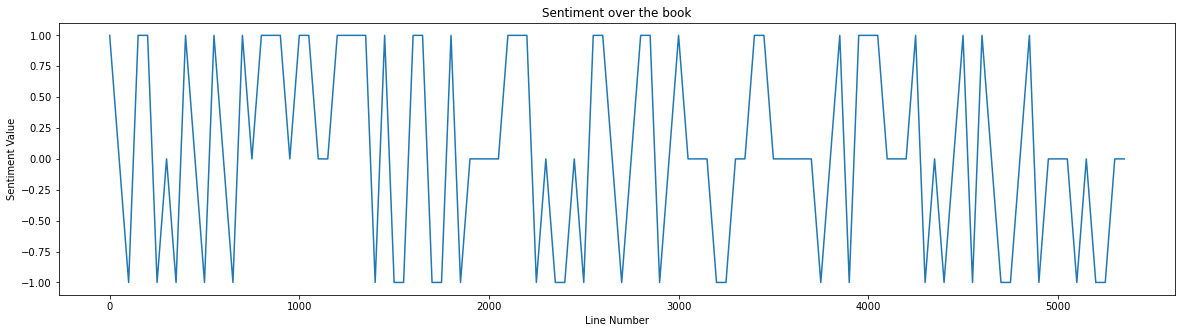

In [31]:
df_plot = df_text_1['Value'][0::50]

fig = df_plot.plot.line(figsize=(20, 5))
fig.set_title('Sentiment over the book')
fig.set_xlabel("Line Number")
fig.set_ylabel("Sentiment Value")

In [32]:
df_text_clean = df_text_1[["Sentences"]].copy()
df_text_clean

,Sentences
0,The year 1866 was signalised by a remarkable i...
1,Not to mention rumours which agitated the mari...
2,"Merchants, common sailors, captains of vessels..."
3,"For some time past, vessels had been met by “a..."
4,The facts relating to this apparition (entered...
...,...
5390,"May the judge disappear, and the philosopher c..."
5391,"If his destiny be strange, it is also sublime."
5392,Have I not understood it myself?
5393,Have I not lived ten months of this unnatural ...


In [33]:
# Converting all string to lower cases.

df_text_clean['Sentences'] = df_text_clean['Sentences'].str.lower()
df_text_clean['CleanedSentences'] = df_text_clean.Sentences.str.replace('[^a-zA-Z0-9]', ' ')
df_text_clean.head()

C:\Users\Nemo\AppData\Local\Temp/ipykernel_17476/2490347735.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_clean['CleanedSentences'] = df_text_clean.Sentences.str.replace('[^a-zA-Z0-9]', ' ')


,Sentences,CleanedSentences
0,the year 1866 was signalised by a remarkable i...,the year 1866 was signalised by a remarkable i...
1,not to mention rumours which agitated the mari...,not to mention rumours which agitated the mari...
2,"merchants, common sailors, captains of vessels...",merchants common sailors captains of vessels...
3,"for some time past, vessels had been met by “a...",for some time past vessels had been met by a...
4,the facts relating to this apparition (entered...,the facts relating to this apparition entered...


In [34]:
# Tokenizing using NLTK 

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
df_text_clean['TokenizedSentence']=df_text_clean['CleanedSentences'].apply(tok.tokenize)
df_text_clean.head()

,Sentences,CleanedSentences,TokenizedSentence
0,the year 1866 was signalised by a remarkable i...,the year 1866 was signalised by a remarkable i...,"[the, year, 1866, was, signalised, by, a, rema..."
1,not to mention rumours which agitated the mari...,not to mention rumours which agitated the mari...,"[not, to, mention, rumours, which, agitated, t..."
2,"merchants, common sailors, captains of vessels...",merchants common sailors captains of vessels...,"[merchants, common, sailors, captains, of, ves..."
3,"for some time past, vessels had been met by “a...",for some time past vessels had been met by a...,"[for, some, time, past, vessels, had, been, me..."
4,the facts relating to this apparition (entered...,the facts relating to this apparition entered...,"[the, facts, relating, to, this, apparition, e..."


In [35]:
sw_list = stopwords.words('english')

df_text_clean['StopwordRemovedSentence'] = df_text_clean['TokenizedSentence'].apply(lambda x: ' '.join([word for word in x if word not in (sw_list)]))
df_text_clean.head()

,Sentences,CleanedSentences,TokenizedSentence,StopwordRemovedSentence
0,the year 1866 was signalised by a remarkable i...,the year 1866 was signalised by a remarkable i...,"[the, year, 1866, was, signalised, by, a, rema...",year 1866 signalised remarkable incident myste...
1,not to mention rumours which agitated the mari...,not to mention rumours which agitated the mari...,"[not, to, mention, rumours, which, agitated, t...",mention rumours agitated maritime population e...
2,"merchants, common sailors, captains of vessels...",merchants common sailors captains of vessels...,"[merchants, common, sailors, captains, of, ves...",merchants common sailors captains vessels skip...
3,"for some time past, vessels had been met by “a...",for some time past vessels had been met by a...,"[for, some, time, past, vessels, had, been, me...",time past vessels met enormous thing long obje...
4,the facts relating to this apparition (entered...,the facts relating to this apparition entered...,"[the, facts, relating, to, this, apparition, e...",facts relating apparition entered various log ...


In [36]:
all_sentences = df_text_clean.StopwordRemovedSentence.to_list()
all_sentences_wordlist= []
for element in all_sentences:
    all_sentences_wordlist.append(element.split())
unique_words = []
for sublist in all_sentences_wordlist:
    for item in sublist:
        unique_words.append(item)

In [37]:
# Using Counter to count occurences in above list

from collections import Counter
counts = Counter(unique_words)
top_10_common_words = counts.most_common(10)
top_10_common_words

[('captain', 635),
 ('nautilus', 520),
 ('nemo', 379),
 ('one', 364),
 ('sea', 349),
 ('said', 333),
 ('ned', 320),
 ('could', 310),
 ('us', 299),
 ('would', 287)]

In [38]:
df_text_clean["Afinn_Score"] = df_text_clean.apply(lambda row : afinn.score(row["StopwordRemovedSentence"]), axis = 1)
df_text_clean

,Sentences,CleanedSentences,TokenizedSentence,StopwordRemovedSentence,Afinn_Score
0,the year 1866 was signalised by a remarkable i...,the year 1866 was signalised by a remarkable i...,"[the, year, 1866, was, signalised, by, a, rema...",year 1866 signalised remarkable incident myste...,1.0
1,not to mention rumours which agitated the mari...,not to mention rumours which agitated the mari...,"[not, to, mention, rumours, which, agitated, t...",mention rumours agitated maritime population e...,6.0
2,"merchants, common sailors, captains of vessels...",merchants common sailors captains of vessels...,"[merchants, common, sailors, captains, of, ves...",merchants common sailors captains vessels skip...,3.0
3,"for some time past, vessels had been met by “a...",for some time past vessels had been met by a...,"[for, some, time, past, vessels, had, been, me...",time past vessels met enormous thing long obje...,0.0
4,the facts relating to this apparition (entered...,the facts relating to this apparition entered...,"[the, facts, relating, to, this, apparition, e...",facts relating apparition entered various log ...,3.0
...,...,...,...,...,...
5390,"may the judge disappear, and the philosopher c...",may the judge disappear and the philosopher c...,"[may, the, judge, disappear, and, the, philoso...",may judge disappear philosopher continue peace...,2.0
5391,"if his destiny be strange, it is also sublime.",if his destiny be strange it is also sublime,"[if, his, destiny, be, strange, it, is, also, ...",destiny strange also sublime,-1.0
5392,have i not understood it myself?,have i not understood it myself,"[have, i, not, understood, it, myself]",understood,0.0
5393,have i not lived ten months of this unnatural ...,have i not lived ten months of this unnatural ...,"[have, i, not, lived, ten, months, of, this, u...",lived ten months unnatural life,0.0


In [39]:
# create a list of our conditions
conditions = [
    (df_text_clean['Afinn_Score'] < 0),
    (df_text_clean['Afinn_Score'] > 0),
    (df_text_clean['Afinn_Score'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'positive', 'neutral']

# create a new column and use np.select to assign values to it using our lists as arguments
df_text_clean['Afinn_Sentiment'] = np.select(conditions, values)

df_text_clean

,Sentences,CleanedSentences,TokenizedSentence,StopwordRemovedSentence,Afinn_Score,Afinn_Sentiment
0,the year 1866 was signalised by a remarkable i...,the year 1866 was signalised by a remarkable i...,"[the, year, 1866, was, signalised, by, a, rema...",year 1866 signalised remarkable incident myste...,1.0,positive
1,not to mention rumours which agitated the mari...,not to mention rumours which agitated the mari...,"[not, to, mention, rumours, which, agitated, t...",mention rumours agitated maritime population e...,6.0,positive
2,"merchants, common sailors, captains of vessels...",merchants common sailors captains of vessels...,"[merchants, common, sailors, captains, of, ves...",merchants common sailors captains vessels skip...,3.0,positive
3,"for some time past, vessels had been met by “a...",for some time past vessels had been met by a...,"[for, some, time, past, vessels, had, been, me...",time past vessels met enormous thing long obje...,0.0,neutral
4,the facts relating to this apparition (entered...,the facts relating to this apparition entered...,"[the, facts, relating, to, this, apparition, e...",facts relating apparition entered various log ...,3.0,positive
...,...,...,...,...,...,...
5390,"may the judge disappear, and the philosopher c...",may the judge disappear and the philosopher c...,"[may, the, judge, disappear, and, the, philoso...",may judge disappear philosopher continue peace...,2.0,positive
5391,"if his destiny be strange, it is also sublime.",if his destiny be strange it is also sublime,"[if, his, destiny, be, strange, it, is, also, ...",destiny strange also sublime,-1.0,negative
5392,have i not understood it myself?,have i not understood it myself,"[have, i, not, understood, it, myself]",understood,0.0,neutral
5393,have i not lived ten months of this unnatural ...,have i not lived ten months of this unnatural ...,"[have, i, not, lived, ten, months, of, this, u...",lived ten months unnatural life,0.0,neutral


In [40]:
df_text_clean["TextBlob_Polarity"] = df_text_clean['StopwordRemovedSentence'].apply(lambda x:tb(x).sentiment[0])

# create a list of our conditions
conditions = [
    (df_text_clean['TextBlob_Polarity'] < 0),
    (df_text_clean['TextBlob_Polarity'] > 0),
    (df_text_clean['TextBlob_Polarity'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'positive', 'neutral']

# create a new column and use np.select to assign values to it using our lists as arguments
df_text_clean['TextBlob_Sentiment'] = np.select(conditions, values)

df_text_clean

,Sentences,CleanedSentences,TokenizedSentence,StopwordRemovedSentence,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment
0,the year 1866 was signalised by a remarkable i...,the year 1866 was signalised by a remarkable i...,"[the, year, 1866, was, signalised, by, a, rema...",year 1866 signalised remarkable incident myste...,1.0,positive,0.375000,positive
1,not to mention rumours which agitated the mari...,not to mention rumours which agitated the mari...,"[not, to, mention, rumours, which, agitated, t...",mention rumours agitated maritime population e...,6.0,positive,0.250000,positive
2,"merchants, common sailors, captains of vessels...",merchants common sailors captains of vessels...,"[merchants, common, sailors, captains, of, ves...",merchants common sailors captains vessels skip...,3.0,positive,-0.016667,negative
3,"for some time past, vessels had been met by “a...",for some time past vessels had been met by a...,"[for, some, time, past, vessels, had, been, me...",time past vessels met enormous thing long obje...,0.0,neutral,-0.060000,negative
4,the facts relating to this apparition (entered...,the facts relating to this apparition entered...,"[the, facts, relating, to, this, apparition, e...",facts relating apparition entered various log ...,3.0,positive,0.350000,positive
...,...,...,...,...,...,...,...,...
5390,"may the judge disappear, and the philosopher c...",may the judge disappear and the philosopher c...,"[may, the, judge, disappear, and, the, philoso...",may judge disappear philosopher continue peace...,2.0,positive,0.250000,positive
5391,"if his destiny be strange, it is also sublime.",if his destiny be strange it is also sublime,"[if, his, destiny, be, strange, it, is, also, ...",destiny strange also sublime,-1.0,negative,-0.050000,negative
5392,have i not understood it myself?,have i not understood it myself,"[have, i, not, understood, it, myself]",understood,0.0,neutral,0.000000,neutral
5393,have i not lived ten months of this unnatural ...,have i not lived ten months of this unnatural ...,"[have, i, not, lived, ten, months, of, this, u...",lived ten months unnatural life,0.0,neutral,0.000000,neutral


In [41]:
senti_int_anal_clean = SentimentIntensityAnalyzer()
df_text_clean["NLTK_Scores"] = df_text_clean['StopwordRemovedSentence'].apply(lambda x:senti_int_anal_clean.polarity_scores(x)["compound"])

# create a list of our conditions
conditions = [
    (df_text_clean['NLTK_Scores'] < 0),
    (df_text_clean['NLTK_Scores'] > 0),
    (df_text_clean['NLTK_Scores'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'positive', 'neutral']

# create a new column and use np.select to assign values to it using our lists as arguments
df_text_clean['NLTK_Sentiment'] = np.select(conditions, values)
df_text_clean

,Sentences,CleanedSentences,TokenizedSentence,StopwordRemovedSentence,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment,NLTK_Scores,NLTK_Sentiment
0,the year 1866 was signalised by a remarkable i...,the year 1866 was signalised by a remarkable i...,"[the, year, 1866, was, signalised, by, a, rema...",year 1866 signalised remarkable incident myste...,1.0,positive,0.375000,positive,0.5574,positive
1,not to mention rumours which agitated the mari...,not to mention rumours which agitated the mari...,"[not, to, mention, rumours, which, agitated, t...",mention rumours agitated maritime population e...,6.0,positive,0.250000,positive,0.2023,positive
2,"merchants, common sailors, captains of vessels...",merchants common sailors captains of vessels...,"[merchants, common, sailors, captains, of, ves...",merchants common sailors captains vessels skip...,3.0,positive,-0.016667,negative,0.5222,positive
3,"for some time past, vessels had been met by “a...",for some time past vessels had been met by a...,"[for, some, time, past, vessels, had, been, me...",time past vessels met enormous thing long obje...,0.0,neutral,-0.060000,negative,0.0000,neutral
4,the facts relating to this apparition (entered...,the facts relating to this apparition entered...,"[the, facts, relating, to, this, apparition, e...",facts relating apparition entered various log ...,3.0,positive,0.350000,positive,0.7269,positive
...,...,...,...,...,...,...,...,...,...,...
5390,"may the judge disappear, and the philosopher c...",may the judge disappear and the philosopher c...,"[may, the, judge, disappear, and, the, philoso...",may judge disappear philosopher continue peace...,2.0,positive,0.250000,positive,0.4939,positive
5391,"if his destiny be strange, it is also sublime.",if his destiny be strange it is also sublime,"[if, his, destiny, be, strange, it, is, also, ...",destiny strange also sublime,-1.0,negative,-0.050000,negative,-0.2023,negative
5392,have i not understood it myself?,have i not understood it myself,"[have, i, not, understood, it, myself]",understood,0.0,neutral,0.000000,neutral,0.0000,neutral
5393,have i not lived ten months of this unnatural ...,have i not lived ten months of this unnatural ...,"[have, i, not, lived, ten, months, of, this, u...",lived ten months unnatural life,0.0,neutral,0.000000,neutral,0.0000,neutral


In [42]:
df_text_clean['Sentiment_list'] = list(zip(df_text_clean['Afinn_Sentiment'], df_text_clean['TextBlob_Sentiment'], df_text_clean['NLTK_Sentiment']))
df_text_clean["Label"] = df_text_clean['Sentiment_list'].apply(lambda x:most_frequent(x))
df_text_clean

,Sentences,CleanedSentences,TokenizedSentence,StopwordRemovedSentence,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment,NLTK_Scores,NLTK_Sentiment,Sentiment_list,Label
0,the year 1866 was signalised by a remarkable i...,the year 1866 was signalised by a remarkable i...,"[the, year, 1866, was, signalised, by, a, rema...",year 1866 signalised remarkable incident myste...,1.0,positive,0.375000,positive,0.5574,positive,"(positive, positive, positive)",positive
1,not to mention rumours which agitated the mari...,not to mention rumours which agitated the mari...,"[not, to, mention, rumours, which, agitated, t...",mention rumours agitated maritime population e...,6.0,positive,0.250000,positive,0.2023,positive,"(positive, positive, positive)",positive
2,"merchants, common sailors, captains of vessels...",merchants common sailors captains of vessels...,"[merchants, common, sailors, captains, of, ves...",merchants common sailors captains vessels skip...,3.0,positive,-0.016667,negative,0.5222,positive,"(positive, negative, positive)",positive
3,"for some time past, vessels had been met by “a...",for some time past vessels had been met by a...,"[for, some, time, past, vessels, had, been, me...",time past vessels met enormous thing long obje...,0.0,neutral,-0.060000,negative,0.0000,neutral,"(neutral, negative, neutral)",neutral
4,the facts relating to this apparition (entered...,the facts relating to this apparition entered...,"[the, facts, relating, to, this, apparition, e...",facts relating apparition entered various log ...,3.0,positive,0.350000,positive,0.7269,positive,"(positive, positive, positive)",positive
...,...,...,...,...,...,...,...,...,...,...,...,...
5390,"may the judge disappear, and the philosopher c...",may the judge disappear and the philosopher c...,"[may, the, judge, disappear, and, the, philoso...",may judge disappear philosopher continue peace...,2.0,positive,0.250000,positive,0.4939,positive,"(positive, positive, positive)",positive
5391,"if his destiny be strange, it is also sublime.",if his destiny be strange it is also sublime,"[if, his, destiny, be, strange, it, is, also, ...",destiny strange also sublime,-1.0,negative,-0.050000,negative,-0.2023,negative,"(negative, negative, negative)",negative
5392,have i not understood it myself?,have i not understood it myself,"[have, i, not, understood, it, myself]",understood,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)",neutral
5393,have i not lived ten months of this unnatural ...,have i not lived ten months of this unnatural ...,"[have, i, not, lived, ten, months, of, this, u...",lived ten months unnatural life,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)",neutral


In [43]:
df_text_clean["Label"].value_counts(normalize=True)

neutral     0.438184
positive    0.303058
negative    0.258758
Name: Label, dtype: float64

In [44]:
# Create the dictionary
label_dictionary ={'neutral' : 0, 'positive' : 1, 'negative' : -1}
 
# Add a new column named 'Price'
df_text_clean['Value'] = df_text_clean['Label'].apply(set_value, args =(label_dictionary, ))
 
# Print the DataFrame
df_text_clean

,Sentences,CleanedSentences,TokenizedSentence,StopwordRemovedSentence,Afinn_Score,Afinn_Sentiment,TextBlob_Polarity,TextBlob_Sentiment,NLTK_Scores,NLTK_Sentiment,Sentiment_list,Label,Value
0,the year 1866 was signalised by a remarkable i...,the year 1866 was signalised by a remarkable i...,"[the, year, 1866, was, signalised, by, a, rema...",year 1866 signalised remarkable incident myste...,1.0,positive,0.375000,positive,0.5574,positive,"(positive, positive, positive)",positive,1
1,not to mention rumours which agitated the mari...,not to mention rumours which agitated the mari...,"[not, to, mention, rumours, which, agitated, t...",mention rumours agitated maritime population e...,6.0,positive,0.250000,positive,0.2023,positive,"(positive, positive, positive)",positive,1
2,"merchants, common sailors, captains of vessels...",merchants common sailors captains of vessels...,"[merchants, common, sailors, captains, of, ves...",merchants common sailors captains vessels skip...,3.0,positive,-0.016667,negative,0.5222,positive,"(positive, negative, positive)",positive,1
3,"for some time past, vessels had been met by “a...",for some time past vessels had been met by a...,"[for, some, time, past, vessels, had, been, me...",time past vessels met enormous thing long obje...,0.0,neutral,-0.060000,negative,0.0000,neutral,"(neutral, negative, neutral)",neutral,0
4,the facts relating to this apparition (entered...,the facts relating to this apparition entered...,"[the, facts, relating, to, this, apparition, e...",facts relating apparition entered various log ...,3.0,positive,0.350000,positive,0.7269,positive,"(positive, positive, positive)",positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5390,"may the judge disappear, and the philosopher c...",may the judge disappear and the philosopher c...,"[may, the, judge, disappear, and, the, philoso...",may judge disappear philosopher continue peace...,2.0,positive,0.250000,positive,0.4939,positive,"(positive, positive, positive)",positive,1
5391,"if his destiny be strange, it is also sublime.",if his destiny be strange it is also sublime,"[if, his, destiny, be, strange, it, is, also, ...",destiny strange also sublime,-1.0,negative,-0.050000,negative,-0.2023,negative,"(negative, negative, negative)",negative,-1
5392,have i not understood it myself?,have i not understood it myself,"[have, i, not, understood, it, myself]",understood,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)",neutral,0
5393,have i not lived ten months of this unnatural ...,have i not lived ten months of this unnatural ...,"[have, i, not, lived, ten, months, of, this, u...",lived ten months unnatural life,0.0,neutral,0.000000,neutral,0.0000,neutral,"(neutral, neutral, neutral)",neutral,0


Text(0, 0.5, 'Sentiment Value')

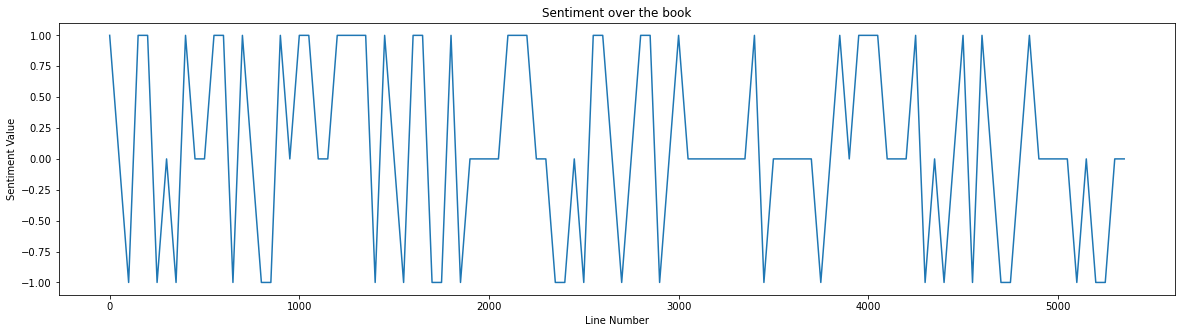

In [45]:
df_plot_clean = df_text_clean['Value'][0::50]

fig_clean = df_plot_clean.plot.line(figsize=(20, 5))
fig_clean.set_title('Sentiment over the book')
fig_clean.set_xlabel("Line Number")
fig_clean.set_ylabel("Sentiment Value")

In [46]:
df_twenty_thousand_labelled = df_text_clean[["Label","StopwordRemovedSentence"]]
df_twenty_thousand_labelled.to_csv(r"C:\Users\Nemo\Downloads\Jules Verne\df_twenty_thousand_labelled.csv", index=False)